<a href="https://colab.research.google.com/github/bharathsaik06/july26/blob/main/bsksoma2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.drop(['User ID'],inplace=True,axis=1)

In [4]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
target = df['Purchased']
df.drop(['Purchased'],inplace=True,axis=1)
target


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
target.unique()

array([0, 1])

In [7]:
df.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [11]:
dict1={'Male':0,'Female':1}
gender = []
for k in df['Gender']:
  gender.append(dict1[k])
df['Gender'] = gender
df.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df,target,train_size=0.7)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(280, 3)
(280,)
(120, 3)
(120,)


[Text(0.4861111111111111, 0.9583333333333334, 'x[1] <= 44.5\ngini = 0.465\nsamples = 280\nvalue = [177, 103]'),
 Text(0.2777777777777778, 0.875, 'x[2] <= 90500.0\ngini = 0.286\nsamples = 202\nvalue = [167, 35]'),
 Text(0.1111111111111111, 0.7916666666666666, 'x[1] <= 36.5\ngini = 0.069\nsamples = 168\nvalue = [162, 6]'),
 Text(0.08641975308641975, 0.7083333333333334, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.13580246913580246, 0.7083333333333334, 'x[2] <= 83500.0\ngini = 0.198\nsamples = 54\nvalue = [48, 6]'),
 Text(0.1111111111111111, 0.625, 'x[2] <= 67000.0\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(0.08641975308641975, 0.5416666666666666, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.13580246913580246, 0.5416666666666666, 'x[2] <= 70500.0\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.1111111111111111, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16049382716049382, 0.4583333333333333, 'x[1] <= 41.5\ngini = 0.245\ns

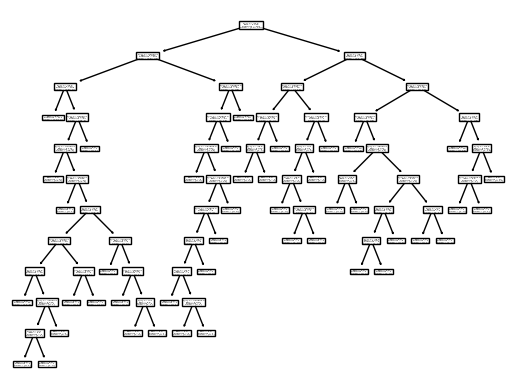

In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)
graph = tree.plot_tree(model)
graph

In [15]:
from sklearn.metrics import accuracy_score
pred = model.predict(xtest)
print("Acuuracy ",accuracy_score(ytest,pred))

Acuuracy  0.9083333333333333


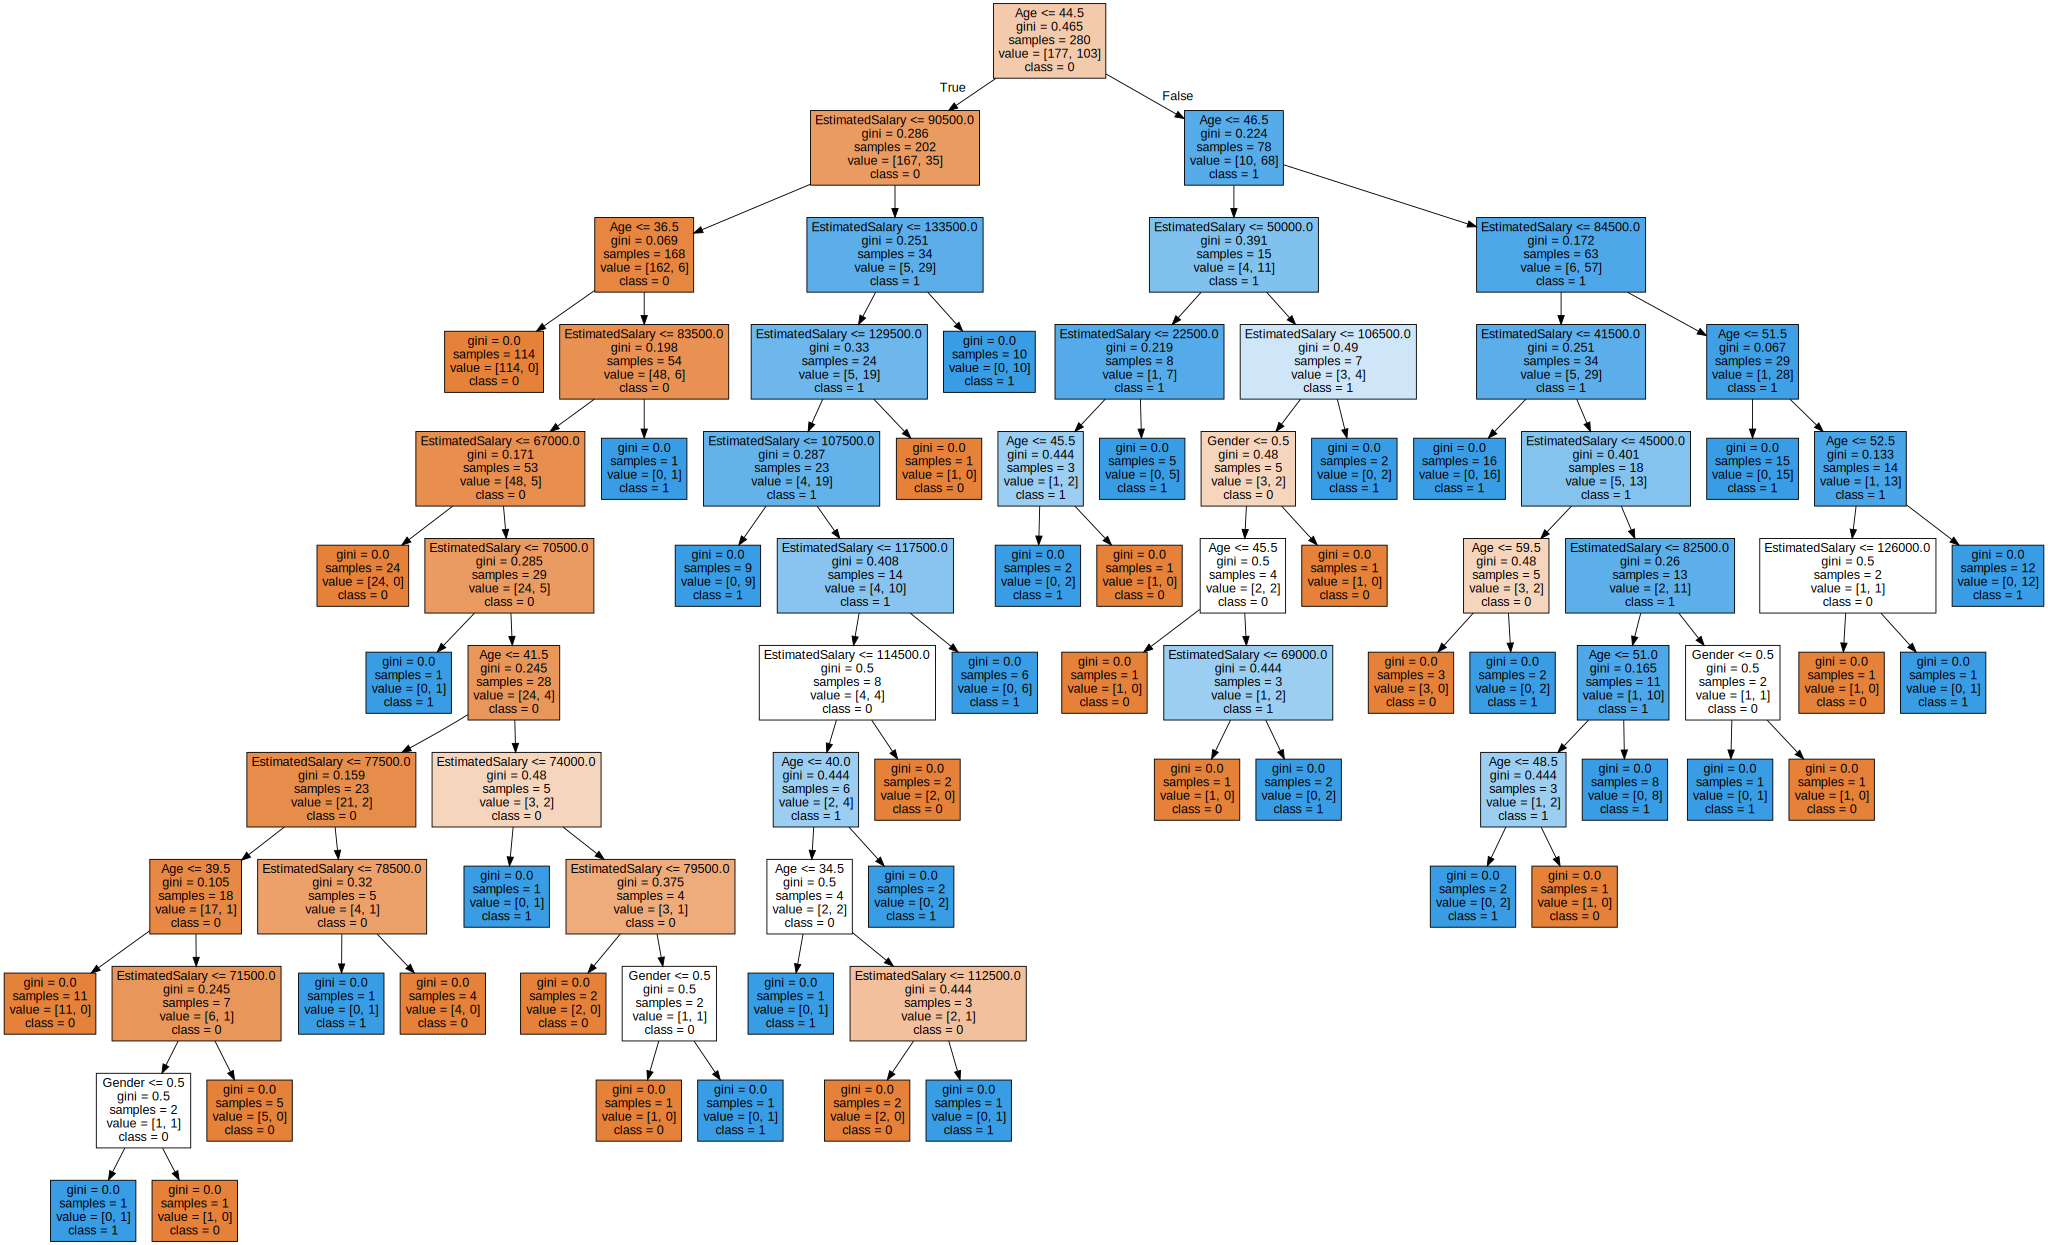

In [17]:
import graphviz
classes = list(map(str,target.unique()))
dot = tree.export_graphviz(model,out_file=None,feature_names=df.columns,class_names=classes,filled=True)
graph = graphviz.Source(dot,"png")
graph